# CRA_bot Analysis
## Housekeeping

In [52]:
#import libraries
import pandas as pd
import numpy as np
from sql_conn import sql_conn
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import scipy.stats as stats

## Set up some data frames we'll use later

In [53]:
# set up one dataframe to rule them all

sql = '''
    select
    s.subject_id,
    s.subject,
    s.subject_type,
    q.question_id,
    q.question,
    qt.question_type_id,
    qt.question_type,
    r.response_id,
    r.response,
    sc.score_id,
    sc.score_weight
from
    subjects s
    inner join
        responses r on s.subject_id = r.subject_id
    inner join
        questions q on r.question_id = q.question_id
    inner join
        question_types qt on q.question_type_id = qt.question_type_id
    inner join
        response_scores rs on r.response_id = rs.response_id
    inner join
        scores sc on rs.score_id = sc.score_id
'''

conn, cursor = sql_conn('responses.db')

df = pd.read_sql(sql,conn)

conn.close()


In [54]:
# set up a bot df

sql = '''
    select
    s.subject_id,
    s.subject,
    s.subject_type,
    q.question_id,
    q.question,
    qt.question_type_id,
    qt.question_type,
    r.response_id,
    r.response,
    sc.score_id,
    sc.score_weight
from
    subjects s
    inner join
        responses r on s.subject_id = r.subject_id
    inner join
        questions q on r.question_id = q.question_id
    inner join
        question_types qt on q.question_type_id = qt.question_type_id
    inner join
        response_scores rs on r.response_id = rs.response_id
    inner join
        scores sc on rs.score_id = sc.score_id
where
    s.subject_type = 'bot'
'''

conn, cursor = sql_conn('responses.db')

bot_df = pd.read_sql(sql,conn)

conn.close()

In [55]:
# set up a human df

sql = '''
    select
    s.subject_id,
    s.subject,
    s.subject_type,
    q.question_id,
    q.question,
    qt.question_type_id,
    qt.question_type,
    r.response_id,
    r.response,
    sc.score_id,
    sc.score_weight
from
    subjects s
    inner join
        responses r on s.subject_id = r.subject_id
    inner join
        questions q on r.question_id = q.question_id
    inner join
        question_types qt on q.question_type_id = qt.question_type_id
    inner join
        response_scores rs on r.response_id = rs.response_id
    inner join
        scores sc on rs.score_id = sc.score_id
where
    s.subject_type = 'human'
'''

conn, cursor = sql_conn('responses.db')

human_df = pd.read_sql(sql,conn)

conn.close()

## Let's get some summary statistics

In [56]:
# total score summary

total_scores = df['score_weight']

print(total_scores.describe())

count    571.000000
mean       3.075306
std        0.762914
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: score_weight, dtype: float64


#### The distribution of all scores is heavily skewed to the left

In [57]:
# total score summary

human_scores = human_df['score_weight']

print(human_scores.describe())

count    183.000000
mean       2.890710
std        0.851031
min        1.000000
25%        2.000000
50%        3.000000
75%        3.500000
max        4.000000
Name: score_weight, dtype: float64


### Interestinglly the mean is smaller here, but the distribution is heavily skewed to the left

In [58]:
# total score summary

bot_scores = bot_df['score_weight']

print(bot_scores.describe())

count    388.000000
mean       3.162371
std        0.702102
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: score_weight, dtype: float64


### The bots have outscored the humans

#### But is it significant?

In [59]:
t_stat, p_value = ttest_ind(human_scores, bot_scores)


print('T-Stat: ', t_stat, " | P-Value: ", p_value)

T-Stat:  -4.023318525326921  | P-Value:  6.513635076731906e-05


#### It looks like it is significant.

### Does the type of question matter?

#### Let's look at analogies first

In [60]:
human_analogy_scores = human_df.loc[human_df['question_type'] == 'Analogy', 'score_weight']

print(human_analogy_scores.describe())

count    41.000000
mean      2.634146
std       0.766684
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: score_weight, dtype: float64


In [61]:
bot_analogy_scores = human_df.loc[bot_df['question_type'] == 'Analogy', 'score_weight']

print(bot_analogy_scores.describe())

count    62.000000
mean      2.951613
std       0.894930
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: score_weight, dtype: float64


In [62]:
t_stat, p_value = ttest_ind(human_analogy_scores, bot_analogy_scores)


print('T-Stat: ', t_stat, " | P-Value: ", p_value)

T-Stat:  -1.8631913103793505  | P-Value:  0.06534093195300862


### Bots outscored humans on analogies, but it is not significant.

#### What of ambiguous prompts?

In [63]:
human_ambiguous_scores = human_df.loc[human_df['question_type'] == 'Ambiguous', 'score_weight']

print(human_ambiguous_scores.describe())

count    79.000000
mean      3.000000
std       0.905822
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: score_weight, dtype: float64


In [64]:
bot_ambiguous_scores = bot_df.loc[bot_df['question_type'] == 'Ambiguous', 'score_weight']

print(bot_ambiguous_scores.describe())

count    125.000000
mean       2.992000
std        0.827901
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: score_weight, dtype: float64


In [14]:
t_stat, p_value = ttest_ind(human_ambiguous_scores, bot_ambiguous_scores)


print('T-Stat: ', t_stat, " | P-Value: ", p_value)

T-Stat:  0.06480934991287637  | P-Value:  0.9483898888827076


### Humans outscored bots on Ambiguity but it's not significant

#### What about Novel question types?

In [65]:
human_novel_scores = human_df.loc[human_df['question_type'] == 'Novel', 'score_weight']

print(human_novel_scores.describe())

count    63.000000
mean      2.920635
std       0.809253
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: score_weight, dtype: float64


In [66]:
bot_novel_scores = human_df.loc[bot_df['question_type'] == 'Novel', 'score_weight']

print(bot_novel_scores.describe())

count    59.000000
mean      2.813559
std       0.819474
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: score_weight, dtype: float64


In [67]:
t_stat, p_value = ttest_ind(human_novel_scores, bot_novel_scores)


print('T-Stat: ', t_stat, " | P-Value: ", p_value)

T-Stat:  0.7258904034748159  | P-Value:  0.4693193378629199


#### Humans outscored bots on novel words, but it is not significant.

### In summary, we can say that bots outscored humans as whole with confidence, but as far as drilling down into the specific question types, we can't say much.

## Let's make some visualizations at the highest level.

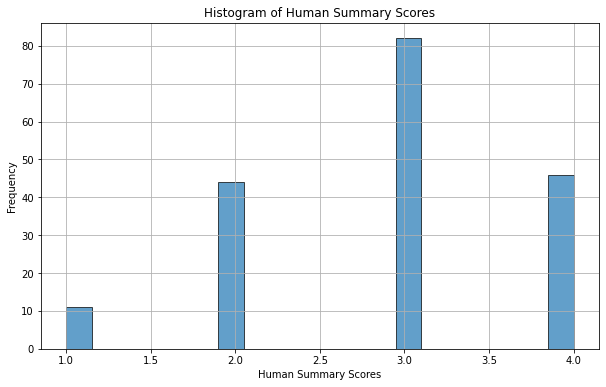

In [68]:
# histogram of human scores

plt.figure(figsize=(10, 6))
plt.hist(human_scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Human Summary Scores')
plt.xlabel('Human Summary Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

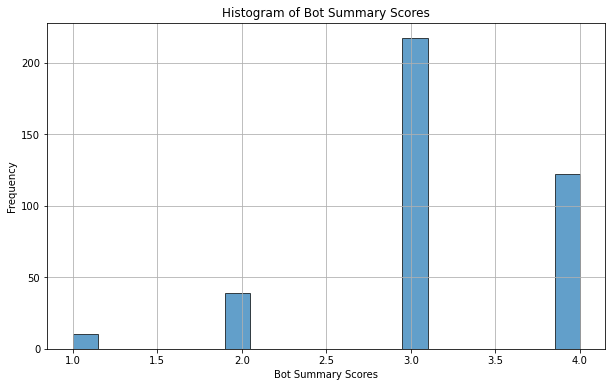

In [69]:
# histogram of bot scores

plt.figure(figsize=(10, 6))
plt.hist(bot_scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Bot Summary Scores')
plt.xlabel('Bot Summary Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Let's put those on the same plot

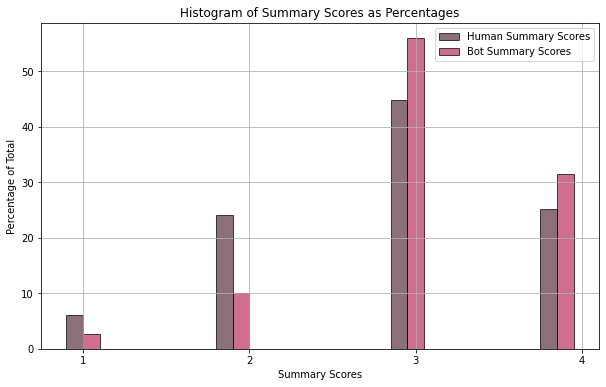

In [70]:
# create the histograms
human_hist, human_bins = np.histogram(human_scores, bins=20)
bot_hist, bot_bins = np.histogram(bot_scores, bins=20)

# scale them
human_hist_percentage = human_hist / human_hist.sum() * 100
bot_hist_percentage = bot_hist / bot_hist.sum() * 100

# define the width of the bars
width = (human_bins[1] - human_bins[0]) / 1.5

# plot the histograms side by side
plt.figure(figsize=(10, 6))

# plot human summary scores
plt.bar(human_bins[:-1] - width / 2, human_hist_percentage, width=width, color='#5B3341', alpha=0.7, edgecolor='black', label='Human Summary Scores')

# plot bot summary scores
plt.bar(bot_bins[:-1] + width / 2, bot_hist_percentage, width=width, color='#BB315F', alpha=0.7, edgecolor='black', label='Bot Summary Scores')

plt.title('Histogram of Summary Scores as Percentages')
plt.xlabel('Summary Scores')
plt.ylabel('Percentage of Total')
plt.legend(loc='upper right')
plt.grid(True)

# set x-axis ticks to only whole numbers
plt.xticks(np.arange(min(human_bins), max(human_bins) + 1, 1))

plt.show()


### That's pretty useful. Let's gussy it up a bit to put it in my presentation.

In [75]:
# create the histograms as percentages
bins = np.arange(min(human_scores.min(), bot_scores.min()), max(human_scores.max(), bot_scores.max()) + 2) - 0.5
human_hist, human_bins = np.histogram(human_scores, bins=bins)
bot_hist, bot_bins = np.histogram(bot_scores, bins=bins)

# scale them
human_hist_percentage = human_hist / human_hist.sum() * 100
bot_hist_percentage = bot_hist / bot_hist.sum() * 100

# define the column widths
width = (human_bins[1] - human_bins[0]) * 0.35

# adjust x-coordinates to center the labels
x_ticks = human_bins[:-1] + 0.5

# create traces
trace1 = go.Bar(
    x=human_bins[:-1] - width / 2 + 0.5,
    y=human_hist_percentage,
    width=width,
    name='Human Scores',
    marker=dict(color='#5B3341')
)

trace2 = go.Bar(
    x=bot_bins[:-1] + width / 2 + 0.5,
    y=bot_hist_percentage,
    width=width,
    name='Bot Scores',
    marker=dict(color='#BB315F')
)

# create the layout
layout = go.Layout(
    title='Understanding Scores as Percentage of Total Scores',
    xaxis=dict(
        title='Understanding Scores',
        tickmode='array',
        tickvals=x_ticks,
        ticktext=[str(int(x)) for x in x_ticks],
    ),
    yaxis=dict(title='Percentage of Total'),
    barmode='overlay',
    bargap=0.2,
    legend=dict(title='Type', x=0.85, y=1.15),
    template='plotly_white',
    font=dict(family='Sagona Book', size=14)
)

# create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# save the figure as an image
fig.write_image("chart.png")

# show the figure
fig.show()

### Can we see anything about individuals?

In [27]:
mean_scores = df.groupby(['subject_id','subject_type'])['score_weight'].mean().reset_index()

mean_scores.rename(columns={'score_weight': 'mean_score_weight'}, inplace=True)

mean_scores_sorted = mean_scores.sort_values(by='mean_score_weight', ascending=False).reset_index(drop=True)

print(mean_scores_sorted)

    subject_id subject_type  mean_score_weight
0          756          bot           3.571429
1          754          bot           3.382353
2          752          bot           3.290323
3          755          bot           3.235294
4          759        human           3.225806
5          747          bot           3.161290
6          751          bot           3.151515
7          760        human           3.117647
8          753          bot           3.093750
9          746          bot           3.093750
10         745          bot           3.058824
11         749          bot           3.030303
12         757        human           3.000000
13         761        human           3.000000
14         762        human           2.939394
15         750          bot           2.935484
16         748          bot           2.857143
17         763        human           2.576923
18         758        human           2.555556


In [29]:
pivot_df = df.pivot_table(values='score_weight', index='subject_id', columns='subject_type')

# Perform ANOVA
f_value, p_value = stats.f_oneway(*[pivot_df[col].dropna() for col in pivot_df.columns])

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")


F-value: 5.2499946643426885
P-value: 0.034990018771146776


### The four best performing models are all bots, and the ANOVA has a p of 0.3. This confirms what we already knew.


In [42]:
bot_df['temp'] = bot_df['subject'].str.extract(r'\|\s*([\d\.]+)$')

bot_df['temp'] = bot_df['temp'].astype(float)

mean_temp_scores = bot_df.groupby(['temp'])['score_weight'].mean().reset_index()

mean_temp_scores.rename(columns={'score_weight': 'mean_score_weight'}, inplace=True)

mean_temp_scores_sorted = mean_temp_scores.sort_values(by='mean_score_weight', ascending=False).reset_index(drop=True)

print(mean_temp_scores_sorted)

   temp  mean_score_weight
0   1.0           3.201550
1   0.5           3.161538
2   0.0           3.124031


In [50]:
grouped_data = bot_df.groupby('temp')['score_weight'].apply(list)

valid_groups = [group for group in grouped_data if len(group) > 1]

if len(valid_groups) > 1:
    f_value, p_value = stats.f_oneway(*valid_groups)
    print(f"F-value: {f_value}")
    print(f"P-value: {p_value}")
else:
    print("Not enough groups with multiple values to perform ANOVA.")


F-value: 0.39204414986658276
P-value: 0.6759437111837998


### There's no meaningful difference in the results of the temperature value on understanding